## Observations (Observations)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#pd.set_option('display.max_rows', None)

In [2]:
df_observations = pd.read_csv('../../synthea-sample-data/data/10k_synthea_covid19_csv/observations.csv')
df_observations

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,6a74fdef-2287-44bf-b9e7-18012376faca,8302-2,Body Height,82.7,cm,numeric
1,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,6a74fdef-2287-44bf-b9e7-18012376faca,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
2,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,6a74fdef-2287-44bf-b9e7-18012376faca,29463-7,Body Weight,12.6,kg,numeric
3,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,6a74fdef-2287-44bf-b9e7-18012376faca,77606-2,Weight-for-length Per age and sex,86.1,%,numeric
4,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,6a74fdef-2287-44bf-b9e7-18012376faca,9843-4,Head Occipital-frontal circumference,46.9,cm,numeric
...,...,...,...,...,...,...,...,...
1659745,2020-02-11,2712205f-755e-4897-acb3-926895b7d635,NaN,QALY,QALY,59.5,a,numeric
1659746,2019-02-11,2712205f-755e-4897-acb3-926895b7d635,NaN,DALY,DALY,18.2,a,numeric
1659747,2020-02-11,2712205f-755e-4897-acb3-926895b7d635,NaN,DALY,DALY,18.5,a,numeric
1659748,2019-02-11,2712205f-755e-4897-acb3-926895b7d635,NaN,QOLS,QOLS,0.7,{score},numeric


In [3]:
df_observations = df_observations.convert_dtypes()
print(df_observations.dtypes)
df_observations.isnull().sum()

DATE           string
PATIENT        string
ENCOUNTER      string
CODE           string
DESCRIPTION    string
VALUE          string
UNITS          string
TYPE           string
dtype: object


DATE               0
PATIENT            0
ENCOUNTER      43488
CODE               0
DESCRIPTION        0
VALUE              0
UNITS          83407
TYPE               0
dtype: int64

### Looking into 189 observations

In [4]:
cols = ['CODE', 'DESCRIPTION', 'VALUE', 'UNITS', 'TYPE']
obs = df_observations[cols].drop_duplicates()
obs

,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,8302-2,Body Height,82.7,cm,numeric
1,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
2,29463-7,Body Weight,12.6,kg,numeric
3,77606-2,Weight-for-length Per age and sex,86.1,%,numeric
4,9843-4,Head Occipital-frontal circumference,46.9,cm,numeric
...,...,...,...,...,...
1659547,14959-1,Microalbumin Creatinine Ratio,568.9,mg/g,numeric
1659583,5804-0,Protein [Mass/volume] in Urine by Test strip,423.4,mg/dL,numeric
1659636,38483-4,Creatinine,16.8,mg/dL,numeric
1659646,14959-1,Microalbumin Creatinine Ratio,578.0,mg/g,numeric


In [5]:
print(obs['CODE'].nunique())
obs['DESCRIPTION'].nunique()

189


201

**What does this tell us?**
- Like conditions, code covers all conditions since a code is used for multiple descriptions

In [6]:
obs.describe()

,CODE,DESCRIPTION,VALUE,UNITS,TYPE
count,40994,40994,40994,40921,40994
unique,189,201,9029,44,2
top,2276-4,Ferritin [Mass/volume] in Serum or Plasma,0.3,mg/dL,numeric
freq,5586,5586,37,7043,40886


In [7]:
codes = obs['CODE'].value_counts()[:189].index.tolist()
codes.sort(reverse=True)
codes

['QOLS',
 'QALY',
 'DALY',
 '9843-4',
 '94531-1',
 '94040-3',
 '9279-1',
 '92142-9',
 '92141-1',
 '92140-3',
 '92139-5',
 '92138-7',
 '92134-6',
 '92131-2',
 '92130-4',
 '89579-7',
 '8867-4',
 '88040-1',
 '85352-3',
 '85344-0',
 '85339-0',
 '85337-4',
 '85319-2',
 '85318-4',
 '8480-6',
 '8462-4',
 '84215-3',
 '8310-5',
 '8302-2',
 '80383-3',
 '80382-5',
 '80271-0',
 '789-8',
 '788-0',
 '787-2',
 '786-4',
 '785-6',
 '777-3',
 '77606-2',
 '770-8',
 '76690-7',
 '75443-2',
 '751-8',
 '742-7',
 '74006-8',
 '736-9',
 '731-0',
 '7258-7',
 '72514-3',
 '72166-2',
 '72106-8',
 '72016-9',
 '72015-1',
 '72014-4',
 '72013-6',
 '72012-8',
 '72011-0',
 '72010-2',
 '72009-4',
 '71972-4',
 '71970-8',
 '71802-3',
 '718-7',
 '713-8',
 '711-2',
 '706-2',
 '704-7',
 '69453-9',
 '6844-5',
 '6833-8',
 '6768-6',
 '6690-2',
 '66534-9',
 '66529-9',
 '66524-0',
 '66519-0',
 '63513-6',
 '6301-6',
 '6299-2',
 '6298-4',
 '6276-0',
 '6273-7',
 '6248-9',
 '6246-3',
 '6206-7',
 '6189-5',
 '6158-0',
 '6106-9',
 '6095-4

In [8]:
n=50
print('List of 50 values:')
top50 = obs['CODE'].value_counts()[:n].index.tolist()
print(top50)

List of 50 values:
['2276-4', '777-3', '32207-3', '14804-9', '2157-6', '14959-1', '33914-3', '8867-4', '8302-2', '29463-7', '6768-6', '2571-8', '18262-6', '2093-3', '5804-0', 'QALY', '59576-9', '2339-0', '19994-3', '77606-2', '1742-6', '2085-9', '2345-7', '1920-8', 'DALY', '770-8', '89579-7', '2708-6', '19926-5', '39156-5', '9279-1', '2703-7', '33762-6', '2885-2', '9843-4', '736-9', '48065-7', '5797-6', '10230-1', '787-2', '4544-3', '38483-4', '6690-2', '3094-0', '6299-2', '21000-5', '72106-8', '8480-6', '2075-0', '1975-2']


In [9]:
top50 = df_observations.loc[(df_observations['CODE'].isin(top50))]
top50

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,6a74fdef-2287-44bf-b9e7-18012376faca,8302-2,Body Height,82.7,cm,numeric
2,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,6a74fdef-2287-44bf-b9e7-18012376faca,29463-7,Body Weight,12.6,kg,numeric
3,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,6a74fdef-2287-44bf-b9e7-18012376faca,77606-2,Weight-for-length Per age and sex,86.1,%,numeric
4,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,6a74fdef-2287-44bf-b9e7-18012376faca,9843-4,Head Occipital-frontal circumference,46.9,cm,numeric
6,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,6a74fdef-2287-44bf-b9e7-18012376faca,8480-6,Systolic Blood Pressure,107.0,mm[Hg],numeric
...,...,...,...,...,...,...,...,...
1659737,2020-05-22,2712205f-755e-4897-acb3-926895b7d635,f69323ee-fc33-45ff-94ba-914acde61601,5804-0,Protein [Mass/volume] in Urine by Test strip,403.8,mg/dL,numeric
1659744,2019-02-11,2712205f-755e-4897-acb3-926895b7d635,<NA>,QALY,QALY,58.8,a,numeric
1659745,2020-02-11,2712205f-755e-4897-acb3-926895b7d635,<NA>,QALY,QALY,59.5,a,numeric
1659746,2019-02-11,2712205f-755e-4897-acb3-926895b7d635,<NA>,DALY,DALY,18.2,a,numeric


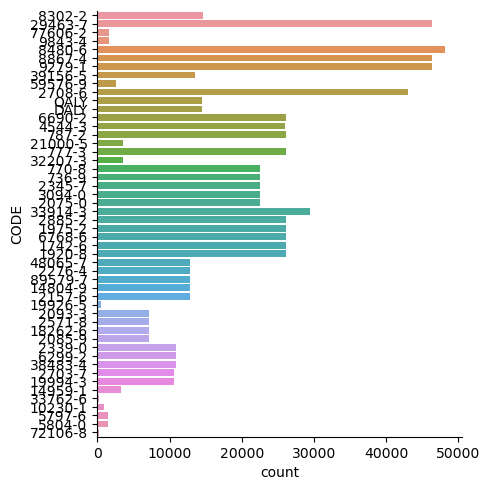

In [10]:
sns.catplot(data=top50, y = 'CODE', kind = 'count')

In [11]:
print('List of 50-100 values:')
top50_100 = obs['CODE'].value_counts()[50:100].index.tolist()
print(top50_100)
top50_100 = df_observations.loc[(df_observations['CODE'].isin(top50_100))]
top50_100

List of 50-100 values:
['1988-5', '2019-8', '2069-3', '5905-5', '718-7', '2028-9', '20565-8', '2951-2', '2947-0', '57905-2', '785-6', '8310-5', '20570-8', '4548-4', '8462-4', '26881-3', '2857-1', '1960-4', '33756-8', '6075-6', '6833-8', '786-4', '74006-8', '5902-2', '6301-6', '6189-5', '789-8', '6085-5', '6095-4', '46240-8', '788-0', '713-8', '32623-1', '751-8', '69453-9', '6246-3', '38265-5', '1751-7', '6844-5', '6158-0', '6106-9', '5792-7', '5803-2', '706-2', '6273-7', '17861-6', '6206-7', '6082-2', '10834-0', '49765-1']


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
5,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,6a74fdef-2287-44bf-b9e7-18012376faca,8462-4,Diastolic Blood Pressure,76.0,mm[Hg],numeric
17,2020-01-30,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,821e57ac-9304-46a9-9f9b-83daf60e9e43,8462-4,Diastolic Blood Pressure,78.0,mm[Hg],numeric
22,2020-03-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,8310-5,Body temperature,39.7,Cel,numeric
26,2020-03-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,8462-4,Diastolic Blood Pressure,75.0,mm[Hg],numeric
49,2019-07-08,067318a4-db8f-447f-8b6e-f2f61e9baaa5,9aa748b8-3b44-4e34-b7a8-2e56f2ca3ca2,8462-4,Diastolic Blood Pressure,77.0,mm[Hg],numeric
...,...,...,...,...,...,...,...,...
1659719,2020-05-22,2712205f-755e-4897-acb3-926895b7d635,f69323ee-fc33-45ff-94ba-914acde61601,1751-7,Albumin [Mass/volume] in Serum or Plasma,4.3,g/dL,numeric
1659720,2020-05-22,2712205f-755e-4897-acb3-926895b7d635,f69323ee-fc33-45ff-94ba-914acde61601,10834-0,Globulin [Mass/volume] in Serum by calculation,3.4,g/L,numeric
1659729,2020-05-22,2712205f-755e-4897-acb3-926895b7d635,f69323ee-fc33-45ff-94ba-914acde61601,5792-7,Glucose [Mass/volume] in Urine by Test strip,1.4,mg/dL,numeric
1659736,2020-05-22,2712205f-755e-4897-acb3-926895b7d635,f69323ee-fc33-45ff-94ba-914acde61601,5803-2,pH of Urine by Test strip,6.6,pH,numeric


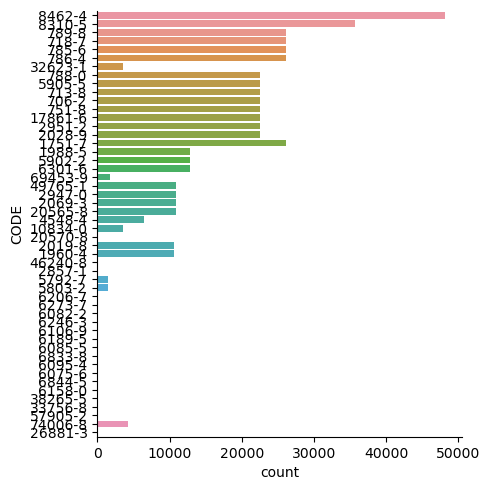

In [12]:
sns.catplot(data=top50_100, y = 'CODE', kind = 'count')

In [13]:
print('List of 100-150 values:')
top100_150 = obs['CODE'].value_counts()[100:150].index.tolist()
print(top100_150)
top100_150 = df_observations.loc[(df_observations['CODE'].isin(top100_150))]
top100_150

List of 100-150 values:
['2823-3', '7258-7', '6276-0', '6298-4', '20505-4', '731-0', 'QOLS', '72514-3', '742-7', '6248-9', '2160-0', '33728-7', '66524-0', '3016-3', '66529-9', '33959-8', '66519-0', '21908-9', '66534-9', '2744-1', '711-2', '85344-0', '30385-9', '33037-3', '2514-8', '72166-2', '30428-7', '5767-9', '26453-1', '20454-5', '26464-8', '42719-5', '704-7', '3024-7', '21905-5', '26515-7', '92142-9', '55277-8', '28245-9', '63513-6', '88040-1', '80383-3', '92141-1', '94531-1', '5794-3', '80382-5', '76690-7', '21906-3', '5778-6', '32167-9']


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
1,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,6a74fdef-2287-44bf-b9e7-18012376faca,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
9,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,6a74fdef-2287-44bf-b9e7-18012376faca,72166-2,Tobacco smoking status NHIS,Never smoker,<NA>,text
11,2020-01-30,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,821e57ac-9304-46a9-9f9b-83daf60e9e43,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,4.0,{score},numeric
21,2020-01-30,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,821e57ac-9304-46a9-9f9b-83daf60e9e43,72166-2,Tobacco smoking status NHIS,Never smoker,<NA>,text
29,2020-03-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,92142-9,Influenza virus A RNA [Presence] in Respirator...,Negative (qualifier value),<NA>,text
...,...,...,...,...,...,...,...,...
1659738,2020-05-22,2712205f-755e-4897-acb3-926895b7d635,f69323ee-fc33-45ff-94ba-914acde61601,20454-5,Protein [Presence] in Urine by Test strip,Urine protein test = +++ (finding),{nominal},text
1659740,2020-05-22,2712205f-755e-4897-acb3-926895b7d635,f69323ee-fc33-45ff-94ba-914acde61601,5794-3,Hemoglobin [Presence] in Urine by Test strip,Urine blood test = negative (finding),{nominal},text
1659743,2020-05-25,2712205f-755e-4897-acb3-926895b7d635,874117a4-16a4-4b86-b268-b8b9e7e72af7,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.0,{score},numeric
1659748,2019-02-11,2712205f-755e-4897-acb3-926895b7d635,<NA>,QOLS,QOLS,0.7,{score},numeric


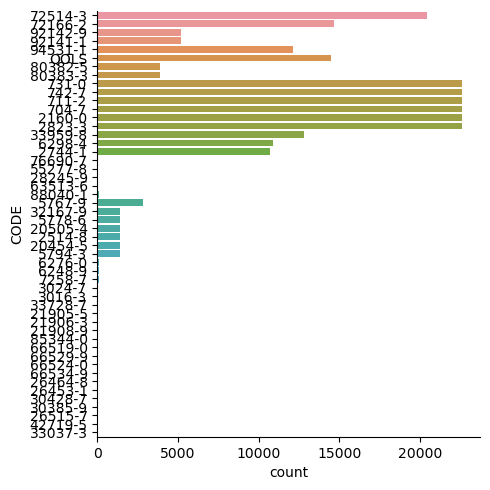

In [14]:
sns.catplot(data=top100_150, y = 'CODE', kind = 'count')

In [15]:
print('List of 150-189 values:')
top150_189 = obs['CODE'].value_counts()[150:189].index.tolist()
print(top150_189)
top150_189 = df_observations.loc[(df_observations['CODE'].isin(top150_189))]
top150_189

List of 150-189 values:
['71970-8', '46288-7', '85319-2', '21907-1', '85318-4', '85339-0', '85337-4', '32465-7', '10480-2', '75443-2', '21924-6', '5799-2', '92140-3', '92131-2', '5811-5', '71802-3', '25428-4', '5770-3', '85352-3', '72016-9', '5802-4', '44667-4', '84215-3', '92134-6', '417181009', '72014-4', '80271-0', '94040-3', '72015-1', '92138-7', '92130-4', '59557-9', '72013-6', '72009-4', '72010-2', '72012-8', '92139-5', '72011-0', '71972-4']


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
31,2020-03-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,92131-2,Respiratory syncytial virus RNA [Presence] in ...,Negative (qualifier value),<NA>,text
32,2020-03-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,92140-3,Parainfluenza virus 1 RNA [Presence] in Respir...,Negative (qualifier value),<NA>,text
33,2020-03-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,92139-5,Parainfluenza virus 2 RNA [Presence] in Respir...,Negative (qualifier value),<NA>,text
34,2020-03-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,92138-7,Parainfluenza virus 3 RNA [Presence] in Respir...,Negative (qualifier value),<NA>,text
35,2020-03-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,92130-4,Rhinovirus RNA [Presence] in Respiratory speci...,Negative (qualifier value),<NA>,text
...,...,...,...,...,...,...,...,...
1659730,2020-05-22,2712205f-755e-4897-acb3-926895b7d635,f69323ee-fc33-45ff-94ba-914acde61601,25428-4,Glucose [Presence] in Urine by Test strip,Urine glucose test = ++ (finding),{nominal},text
1659732,2020-05-22,2712205f-755e-4897-acb3-926895b7d635,f69323ee-fc33-45ff-94ba-914acde61601,5770-3,Bilirubin.total [Presence] in Urine by Test strip,Finding of bilirubin in urine (finding),{nominal},text
1659735,2020-05-22,2712205f-755e-4897-acb3-926895b7d635,f69323ee-fc33-45ff-94ba-914acde61601,5811-5,Specific gravity of Urine by Test strip,1.0,{nominal},numeric
1659739,2020-05-22,2712205f-755e-4897-acb3-926895b7d635,f69323ee-fc33-45ff-94ba-914acde61601,5802-4,Nitrite [Presence] in Urine by Test strip,Urine nitrite negative (finding),{nominal},text


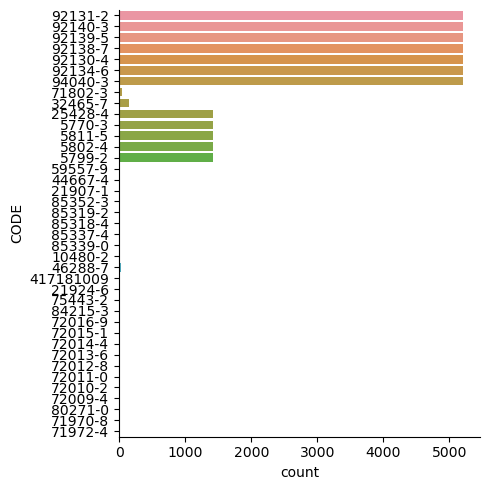

In [16]:
sns.catplot(data=top150_189, y = 'CODE', kind = 'count')

In [17]:
codes

['QOLS',
 'QALY',
 'DALY',
 '9843-4',
 '94531-1',
 '94040-3',
 '9279-1',
 '92142-9',
 '92141-1',
 '92140-3',
 '92139-5',
 '92138-7',
 '92134-6',
 '92131-2',
 '92130-4',
 '89579-7',
 '8867-4',
 '88040-1',
 '85352-3',
 '85344-0',
 '85339-0',
 '85337-4',
 '85319-2',
 '85318-4',
 '8480-6',
 '8462-4',
 '84215-3',
 '8310-5',
 '8302-2',
 '80383-3',
 '80382-5',
 '80271-0',
 '789-8',
 '788-0',
 '787-2',
 '786-4',
 '785-6',
 '777-3',
 '77606-2',
 '770-8',
 '76690-7',
 '75443-2',
 '751-8',
 '742-7',
 '74006-8',
 '736-9',
 '731-0',
 '7258-7',
 '72514-3',
 '72166-2',
 '72106-8',
 '72016-9',
 '72015-1',
 '72014-4',
 '72013-6',
 '72012-8',
 '72011-0',
 '72010-2',
 '72009-4',
 '71972-4',
 '71970-8',
 '71802-3',
 '718-7',
 '713-8',
 '711-2',
 '706-2',
 '704-7',
 '69453-9',
 '6844-5',
 '6833-8',
 '6768-6',
 '6690-2',
 '66534-9',
 '66529-9',
 '66524-0',
 '66519-0',
 '63513-6',
 '6301-6',
 '6299-2',
 '6298-4',
 '6276-0',
 '6273-7',
 '6248-9',
 '6246-3',
 '6206-7',
 '6189-5',
 '6158-0',
 '6106-9',
 '6095-4